## 1. 초기 설정

In [1]:
import torch
from torch.autograd import Variable
import numpy as np

torch.manual_seed(777)

## 2. training set과 Variable 만들기

In [39]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

nb_classes = 7

X = Variable(torch.from_numpy(x_data))
Y = Variable(torch.from_numpy(y_data))

# one-hot encoding을 사용한다.
# (101, 7) 크기의 0으로 채워진 행렬을 선언해서 Y_one_hot에 할당한다.
Y_one_hot = torch.zeros(Y.size()[0], nb_classes)
# scatter_(dim, index, src)라는 Tensor의 메서드는 index와 dim을 이용해서 src값을 행렬에 넣게 된다.
# dim은 행렬을 인덱스를 이용해서 참조할 때, 몇 번째 대괄호인지 나타내는 값이다. 
# 0이면 첫 번째 대괄호, 1이면 두 번째 대괄호, ...
# 어떻게 이들을 이용해서 위치를 결정하는지는 아래의 이미지를 보자
Y_one_hot.scatter_(1, Y.long().data, 1)
Y_one_hot = Variable(Y_one_hot)
print("one_hot", Y_one_hot.data)

(101, 16) (101, 1)
one_hot 
    1     0     0     0     0     0     0
    1     0     0     0     0     0     0
    0     0     0     1     0     0     0
    1     0     0     0     0     0     0
    1     0     0     0     0     0     0
    1     0     0     0     0     0     0
    1     0     0     0     0     0     0
    0     0     0     1     0     0     0
    0     0     0     1     0     0     0
    1     0     0     0     0     0     0
    1     0     0     0     0     0     0
    0     1     0     0     0     0     0
    0     0     0     1     0     0     0
    0     0     0     0     0     0     1
    0     0     0     0     0     0     1
    0     0     0     0     0     0     1
    0     1     0     0     0     0     0
    1     0     0     0     0     0     0
    0     0     0     1     0     0     0
    1     0     0     0     0     0     0
    0     1     0     0     0     0     0
    0     1     0     0     0     0     0
    1     0     0     0     0     0     0
    0 

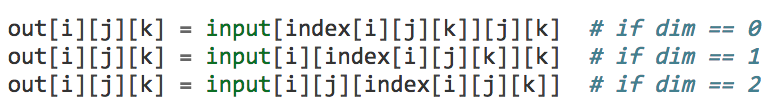

## 3. model 만들기

In [40]:
softmax = torch.nn.Softmax(dim=1)
# 이후 밑에서 사용할 torch.nn.CorssEntropyLoss메서드는 안에 softmax를 가지고 있다.
# 따라서 그냥 linear와 softmax를 합치지 않고 나중에 확인할 때 model에 softmax를 써서 확인할 것이다.
model = torch.nn.Linear(16, nb_classes, bias=True)

## 4. cost function과 optimizer 만들기

In [41]:
# torch.nn.CrossEntropyLoss메서드는 2차원 Tensor를 input(X)으로, 1차원 Tensor를 target(Y)으로 받는다.
cost_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

## 5. model 훈련시키기

In [43]:
for step in range(2001):
    optimizer.zero_grad()
    
    Y_hat = model(X)
    # view메서드는 resize와 같다. 같은 데이터를 가지고 다른 size의 새 Tensor를 만든다.
    # view메서드에 -1을 인자로 넣으면 다른 부분을 가지고 추론한다는 의미
    # x가 (4, 4)행렬인데, x.view(-1, 8)은 (2, 8)행렬이 된다. 8을 가지고 추론을 했다는 의미.
    # Y.long()는 2차원 Tensor이고, Y.long().view(-1)은 1차원 Tensor이다.
    cost = cost_func(Y_hat, Y.long().view(-1))
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(step, cost.data.numpy())

0 [ 0.00617874]
100 [ 0.00614897]
200 [ 0.0061195]
300 [ 0.0060903]
400 [ 0.0060614]
500 [ 0.00603275]
600 [ 0.00600439]
700 [ 0.00597629]
800 [ 0.00594847]
900 [ 0.0059209]
1000 [ 0.00589357]
1100 [ 0.00586653]
1200 [ 0.0058397]
1300 [ 0.00581314]
1400 [ 0.00578682]
1500 [ 0.00576074]
1600 [ 0.00573489]
1700 [ 0.00570928]
1800 [ 0.0056839]
1900 [ 0.00565874]
2000 [ 0.00563381]


## 6. model 확인하기

In [49]:
# torch.max(input, dim, keepdim=False, out=None)메서드는 (Tensor, LongTensor)를 출력한다.
# 이 때 LongTensor는 Tensor안의 각 수에 대한 dim기준 인덱스를 나타낸다.
predicted = torch.max(softmax(model(X)), 1)[1].float()

# Tensor도 zip이 된다.
for p, y in zip(predicted, Y):
    print("[{}] Prediction: {} True Y: {}".format(bool(p.data[0] == y.data[0]), p.data.int()[0], y.data.int()[0]))

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 5 True Y: 5
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 5 True Y: 5
[True] Prediction: 0 True Y: 0
[True] P